# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev1 toc-item"><a href="#Requirements" data-toc-modified-id="Requirements-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Requirements</a></div><div class="lev1 toc-item"><a href="#Problem-analysis" data-toc-modified-id="Problem-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Problem analysis</a></div><div class="lev2 toc-item"><a href="#Control-the-range-of-intermediate-and-output-values" data-toc-modified-id="Control-the-range-of-intermediate-and-output-values-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Control the range of intermediate and output values</a></div><div class="lev2 toc-item"><a href="#The-number-of-memory-accesses-required-to-process-one-image" data-toc-modified-id="The-number-of-memory-accesses-required-to-process-one-image-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>The number of memory accesses required to process one image</a></div><div class="lev2 toc-item"><a href="#DRAM-memory-required" data-toc-modified-id="DRAM-memory-required-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>DRAM memory required</a></div><div class="lev2 toc-item"><a href="#Workload-(arithmetic-operations)" data-toc-modified-id="Workload-(arithmetic-operations)-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Workload (arithmetic operations)</a></div><div class="lev2 toc-item"><a href="#Differences-between-vertical-scaling-and-horizontal-scaling" data-toc-modified-id="Differences-between-vertical-scaling-and-horizontal-scaling-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Differences between vertical scaling and horizontal scaling</a></div><div class="lev2 toc-item"><a href="#Parallelism-required" data-toc-modified-id="Parallelism-required-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Parallelism required</a></div><div class="lev2 toc-item"><a href="#Relation-between-required-parallelism-and-the-DRAM-burst-size" data-toc-modified-id="Relation-between-required-parallelism-and-the-DRAM-burst-size-37"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Relation between required parallelism and the DRAM burst size</a></div><div class="lev2 toc-item"><a href="#Other-questions" data-toc-modified-id="Other-questions-38"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Other questions</a></div><div class="lev1 toc-item"><a href="#Design" data-toc-modified-id="Design-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Design</a></div><div class="lev2 toc-item"><a href="#Our-design" data-toc-modified-id="Our-design-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Our design</a></div><div class="lev2 toc-item"><a href="#Reflection" data-toc-modified-id="Reflection-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Reflection</a></div><div class="lev1 toc-item"><a href="#Verification" data-toc-modified-id="Verification-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Verification</a></div><div class="lev2 toc-item"><a href="#Functional-verification" data-toc-modified-id="Functional-verification-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Functional verification</a></div><div class="lev2 toc-item"><a href="#Throughput-verfication" data-toc-modified-id="Throughput-verfication-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Throughput verfication</a></div><div class="lev1 toc-item"><a href="#Resource-Analysis" data-toc-modified-id="Resource-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Resource Analysis</a></div><div class="lev2 toc-item"><a href="#Throughput" data-toc-modified-id="Throughput-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Throughput</a></div><div class="lev2 toc-item"><a href="#Latency" data-toc-modified-id="Latency-62"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Latency</a></div><div class="lev2 toc-item"><a href="#Memory" data-toc-modified-id="Memory-63"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Memory</a></div><div class="lev2 toc-item"><a href="#Read/write-bandwidth-of-DRAM" data-toc-modified-id="Read/write-bandwidth-of-DRAM-64"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Read/write bandwidth of DRAM</a></div><div class="lev2 toc-item"><a href="#Compute-resource-of-nodes" data-toc-modified-id="Compute-resource-of-nodes-65"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Compute resource of nodes</a></div><div class="lev2 toc-item"><a href="#Utilization" data-toc-modified-id="Utilization-66"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Utilization</a></div><div class="lev2 toc-item"><a href="#Roofline-analysis" data-toc-modified-id="Roofline-analysis-67"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>Roofline analysis</a></div><div class="lev1 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></div><div class="lev2 toc-item"><a href="#Reflection*" data-toc-modified-id="Reflection*-71"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Reflection*</a></div><div class="lev1 toc-item"><a href="#Bibliography" data-toc-modified-id="Bibliography-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bibliography</a></div>

In [1]:
import sys 
sys.path.append('/Users/kees/Documents/sky_lab/hsim/StaccatoLab')

import math
import numpy as np

from StaccatoLab import *
from matplotlib import pyplot as plt
from collections.abc import Iterable

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
version() 

'StaccatoLab: version alpha.11'

$~$
<P STYLE="font-size: 36pt; text-align: center;"> 
    VLSI Programming (2IMN35) 2020 </P>
<P STYLE="font-size: 36pt; text-align: center;"> 
    Major Assignment 3: *Video Scaler*  </P>
$~$
<P STYLE="font-size: 18pt; text-align: center;"> 
    Kees van Berkel   </P>
$~$

# Introduction

From [Video scaler](https://en.wikipedia.org/wiki/Video_scaler):

>A video scaler is a system which converts video signals from one display resolution to another; typically, scalers are used to convert a signal from a lower resolution (such as 480p standard definition) to a higher resolution (such as 1080i high definition), a process known as "upconversion" or "upscaling" (by contrast, converting from high to low resolution is known as "downconversion" or "downscaling").

>Video scalers are typically found inside consumer electronics devices such as televisions, video game consoles, and DVD or Blu-ray players, but can also be found in other AV equipment (such as video editing and television broadcasting equipment). 

For this assignment we simplify video scaling somewhat to scaling a sequence of images.
From [Image scaling](https://en.wikipedia.org/wiki/Image_scaling#Sinc_and_Lanczos_resampling):

> In computer graphics and digital imaging, image scaling refers to the resizing of a digital image. In video technology, the magnification of digital material is known as upscaling or resolution enhancement.

> When scaling a raster graphics image, a new image with a higher or lower number of pixels must be generated. In the case of decreasing the pixel number (scaling down) this usually results in a visible quality loss. From the standpoint of digital signal processing, the scaling of raster graphics is a two-dimensional example of sample-rate conversion, the conversion of a discrete signal from a sampling rate (in this case the local sampling rate) to another.

The same Wikipedia lemma presents [Lanczos resampling](https://en.wikipedia.org/wiki/Lanczos_resampling) as a possible way to implement image scaling. And yes, indeed, this is essentially the same sample-rate conversion algorithm that was the basis for Major Assignment 2! Main differences are:
- Images are 2 dimensional, where as an audio stream is 1 dimensional.
2D Lanczos resampling can be implemented by applying 1D resampling to all pixel-rows of each image, followed by 1D resampling of all pixel columns. (Or in the opposite order).
- Pixel rows (columns) are finite, whereas the audio stream has no fixed length.

# Requirements

The Video Scaler for this assignment will accept a stream of inputs image and produce a stream of output images.
The requirements are inspired by a version that performs a Video Scaling real-time on a monochrome HDTV image stream.
- Dynamic range: 8b, i.e. `uint8` values in the range [0..255]. This applies to both input and output pixels.
- Monochrome (i.e. 1 pixel is one 8-bit value).
- Input image size: 1280 x 720, "720p", aka "HD ready"
- Output image size: 1920 x 1080, "HD".
- Frame rate: 100Hz.

Implementation constraints:
- Graph rate = 100MHz. 
- The DRAM also runs at the graph rate, with burst size of `B=16` bytes.
Note that the DRAM must also allow a source to write input images into the DRAM,
and a sink to consume the scaled images.

Full images are considered large, and must be stored in a single DRAM.

From the requirements, we have

In [2]:
graph_rate = 1e8
memory_i_pf = 1280 * 720 * 8 / 8   # per input frame consumption 
memory_o_pf = 1920 * 1080 * 8 / 8  # per output frame consumption
print('Each input frame cost', memory_i_pf/1024, 'kB')
print('Each output frame cost', memory_o_pf/1024, 'kB')

Each input frame cost 900.0 kB
Each output frame cost 2025.0 kB


And one pixel is of size 1 byte. So every burst of DRAM will involve exactly `B` pixels.

In [3]:
B = 16  # burst size

# Problem analysis


Review the requirements, and address questions like
- how to control the range of intermediate and output values?
- how many memory accesses are required to process one image? 
- how much DRAM memory is required?
- how large is the workload (how many arithmetic operations for given image size)?
- how is vertical scaling different from horizontal scaling?
- how much parallelism is required?
- how does the required parallelism relate to the DRAM burst size?
- what other question should you ask yourself?

Include a roofline as prepared below.
- `ai` is the arithmetic intensity according to your analysis.

## Control the range of intermediate and output values

Each pixel provided is of type `uint8`, so the range of input and output should remain in the range of `uint8`, *i.e.* $[0, 255]$. But during scaling, overflow are of high possibilities if we keep this range, because the weighted sum is likely to be greater than 255. So for intermediate results, we broaden the range to `int16` ($[-32768, 32767]$). After the calculation of the weighted average (scaling), most results will fall in the `uint8` range. But due to the negative coefficients of `Lanczos` sampler, there is still a potential for overflow. Hence, we need to perform a final check to set the overflow results to 0 or 255. If we use the `poor-man` scaler, the extension to `int16` is also crucial (because the sum of neighbour pixels), but the final check is redundance, since the average of two values in range `uint8` will definately be in range `uint8`. To sum up,

- If we use `Lanczos` sampler, for intermediate values, we need to extend the range to `int16`, and perform a check on the output values to set all result values in range `uint8`.

- If we use `poor-man` sampler, we still need to extend the range to `int16` for intermediate results. Whereas for output values, we can directly convert the results into `uint8`.




## The number of memory accesses required to process one image

The number of memory accesses is equal to the burst times. We know that `B=16` in this assignment. Therefore, to process one image, the access time is

In [4]:
n_i = memory_i_pf/B  # num of memory access for reading / writing an input image
n_o = memory_o_pf/B  # num of memory access for reading / writing an output image
n_i, n_o

(57600.0, 129600.0)

Concretely,

- To read / write an input image, the memory access time $n_i$ is 57600.
- To read / write an output image, the memory access time $n_o$ is 129600.

Based on these results, we can now observe the total number of memory accesses $n_{total}$ for one image in this scaling. However, this is strictly related to the method we utilize. So we first define a scaling roadmap, then calculate $n_{total}$. One feasible solution is 

1. read and scale the image row by row (read: $n_i$, write: $1920 \times 720 \div B$)
2. transpose the image in 1 (read / write: $1920 \times 720 \div B$)
3. read and scale the image in 2 row by row (read: $1920 \times 720 \div B$, write: $n_o$)
4. transpose the image in 3 (read / write: $n_o$)

Using this method, $n_{total}=792000$.

In [5]:
n_total = (n_i + 1920*720/B) + (2*1920*720/B) + (1920*720/B + n_o) + (2*n_o)
n_total

792000.0

If we use a different method, the result will change accordingly.

## DRAM memory required

Ideally, there are two components in paralell in DRAM, namely input images of size $1280 \times 720$ and output images of size $1920 \times 1080$. Hence, the total DRAM memory required is 2925 kB.

In [6]:
print('DRAM required =', (memory_i_pf + memory_o_pf)/1024, 'kB')

DRAM required = 2925.0 kB


## Workload (arithmetic operations)

There are two possible scaling schemes. One is using `lanczos2`, the other is using so-called `poor-man` scaling. So we will investigate these two schemes respectively.

- For `lanczos2` based solutions, according to the last major assignment, there are 7 arithmetics in total (4 multiplications and 3 additions) for each pixel approxiamately. 
- For `poor-man` based solutions, for each pair of pixels, a new pixel in between is added of value $(first+last)/2$, where $first$ and $last$ are the pair of pixels selected. Thus in this case, there are 2 arithmetics in total (1 addition and 1 division) for each pixel approxiamately.

Now we can calculate the total workload. If we utilize the solution described in section 3.2 (horizontal scaling, transposing, horizontal scaling, transposing). Note that there are no arithmetic operation needed to perform transposing.

- for `lanczos2` based solutions, its workload $\mathcal W_{lanczos} = 16128000$
- for `poor-man` based solutions, its workload $\mathcal W_{poorman} = 2304000$

In [7]:
w_lanc = 1280*720*7+1920*720*7
w_poor = 1280*720/2*2+1920*720/2*2
w_lanc, w_poor

(16128000, 2304000.0)

Based on these results, we can perform corresponding roofline analysis. According to [lecture note 11 rooflines], arithmetic intensity $I_A$ is defined as 

$$
I_A = \frac{number\_of\_operations}{size\_of\_(input+output)[bytes]}
$$

Hence, the arithmetic intensity of `lanczos` solutions are 5.38 ops/byte, and the arithmetic intensity of `poor-man` solutions are 1.54 ops/byte. Note that here one pixel is of size 1 byte.

In [8]:
w_lanc/(1280*720+1920*1080), w_poor/(1280*720+1920*1080), 

(5.384615384615385, 0.7692307692307693)

So the roofline result of `lanczos` can be depiced as follows.

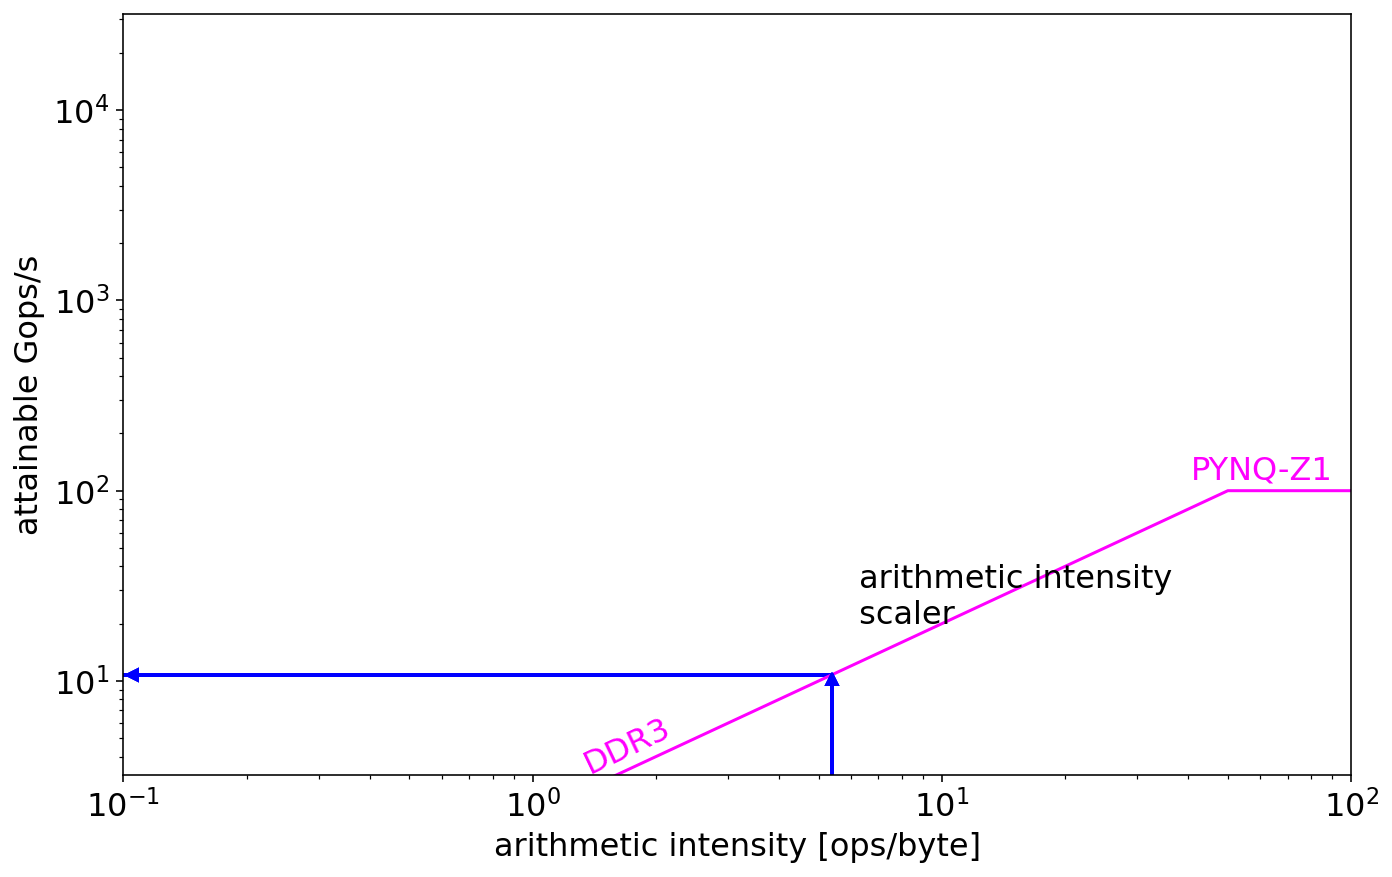

In [9]:
F_scaler = F_dsp('scaler', ai=5.38)
R_scaler = roofline(M_PYNQ, F_scaler, shape='*', color='magenta')
roofline_plot([R_scaler]).plot();

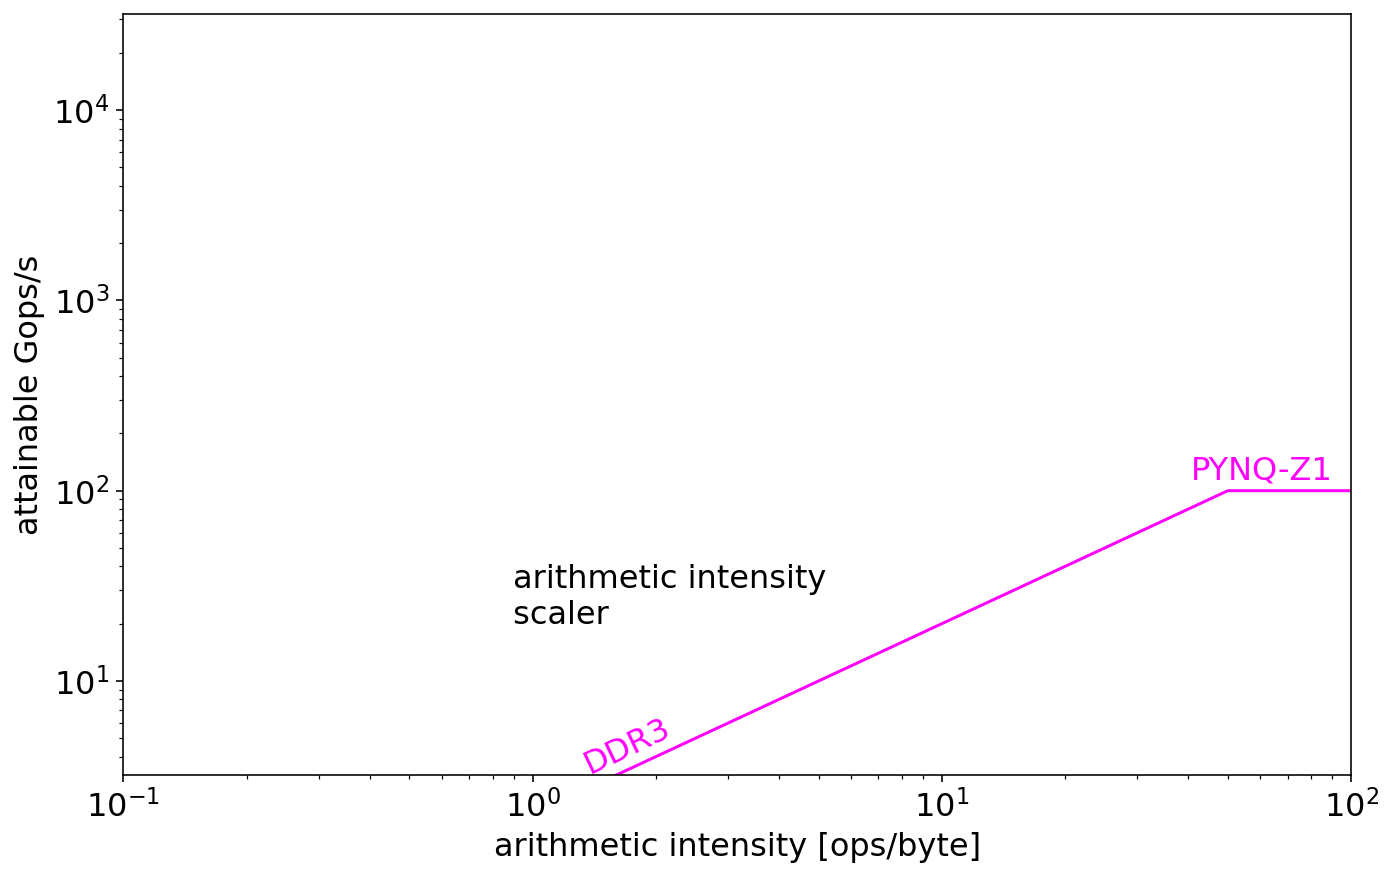

In [10]:
F_scaler = F_dsp('scaler', ai=0.77)
R_scaler = roofline(M_PYNQ, F_scaler, shape='*', color='magenta')
roofline_plot([R_scaler]).plot();

## Differences between vertical scaling and horizontal scaling

It is found that the data are stored in row-major order, which means that the consecutive elements of a row reside next to each other. So after reading from DRAM, array can be directly processed for horizontal scaling, because column pixels are non-adjacent in row-major storage, which is hard to read / write as consecutive blocks. While for vertical scaling, a transpose function need to be considered before scaling. After transposing, the data stored in column will be stored in row, and the same procedure can be executed for scaling.

## Parallelism required

We need to calculate the Gops/s first. The required frame rate is 100 Hz, and for each frame, there are $\mathcal W_{lanczos} = 16128000$ operations for `lanczos2` based solutions, and $\mathcal W_{poorman} = 2304000$ operations for `poor-man` based solutions, so the number of operations per cycle for these tow cases are $OPC_{lanczos}=1.6128\times 10^9$ and $OPC_{poorman}=0.2304\times 10^9$, respectively.

In [11]:
frame_rate = 100
opc_lanc = frame_rate * w_lanc / 1e9
opc_poor = frame_rate * w_poor / 1e9
opc_lanc, opc_poor

(1.6128, 0.2304)

The graph rate is $100 MHz$. So for `lanczos2` based solutions, each firing should involve at least 16.128 operations. But one node can only perform 7 operations, so at least 3 parallel subgraphs that can process one frame together is essential. Whereas for `poorman` based solution, using the same analysis, each firing should involve at least 2.304 operations, so at least 2 parallel subgraphs that can process one frame together is essential.

## Relation between required parallelism and the DRAM burst size

In our opinion, there are no relationships between the paralellism and DRAM burst size. In the previous roofline analysis, we know that both solutions can be implememnted on PYNQ-Z1 board with DDR3 memory. Also, we only consider the arithmetic operations. So the burst size will not affect the paralellism. 

## Other questions

There is an obvious question about the index mapping scheme for transposing, since an image is represented by an 1D array. For a image of size $w \times l$, where $w$, $l$ are the width and length of the image, the index in the transposed image $r_t$ of $r$-th pixel in the origin image is

$$
r_t = l \times (r~\mathbf{mod}~w) + (r~\mathbf{div}~w)
$$

In this way, we can utilize this index mapping scheme for later usage. 

# Design

Suggested approach: follow a stepwise approach:
1. Familiarize yourself with the graph `Grot` program below and with the graphs in `lecture-11-array-tokens.ipynb`.
2. Extend the program to a 1D Video Scaler (x-direction).
3. Extend the program to a 2D Video Scaler (include y-direction).
4. Optimize data types for low cost.

Use dataflow nodes of *medium* grainsize, i.e nodes that abide by the "*rule of 6*":
- locality of communication: #inputs + #outputs   <=6 (incl. self loops)
- locality of state        : #fsm rules $\leq$ 6 (incl $\leq$ 1 repeat/select/choice)
- locality of reference    : fo(): reads $\leq$ 6 scalar values

Any node not meeting these rules needs a first-class justification!

Further hints: 
- Beware that the output values of the rate converter must be of type `np.uint8`;
- Use small synthetic images (e.g. `test_image()` below) of an appropriate size during development, and use realistic images for more verification.
- There is no need to use HD images for verification.  
  The provided `../images/valve.png` is fine.
  However, the provided HD resolution numbers must be used to analyze 
  the throughput (DRAM bandwidth and overall GOPS/sec) of your design.
- Do not wait with documenting your design choices until your program is fully functional.
- Use the content structure of this notebook also for your report. 
Make sure that you deliver on the titles of each chapter!
- In case you have not succeeded in designing a correct audio scaler in major assignment 2 that you can reuse here, you may fall back on a so-called poor man's scaler. Note that the upscale factor is $3/2$ so every two input samples must be replaced by three output samples. A poor man's scaler would copy the first and last sample of the pairs and take the average of the two input samples as the middle value. 

The `test_image()` is defined as follows. 

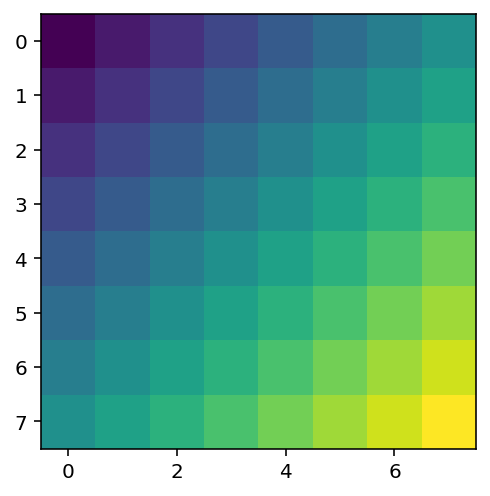

In [12]:
def test_image(N):
    return np.array([i//N +i%N for i in range(N**2)], 
                    dtype=np.uint8).reshape((N,N))
A = test_image(8) 
plt.imshow(A);

## Our design

Using the index mapping scheme for transposing described in section 3.8, we can define a `Transpose()` class to define nodes for tranposing.

In [13]:
class Transpose(Node):
    """ transpose one matrix represented by an array"""
    def __init__(self, w, l):
        super(Transpose, self).__init__()
        self.set_fsm ([Repeat(w*l, enter=Rule(If=[1,], Ir=[1,], Of=[1,], Od=[1,]),
                                   iter =Rule(I =[0,],                   Od=[1,]),
                                   exit =Rule(Id=[1,],          Od=[1,], Or=[1,], s=0))])
        self.fo= [lambda x,r: (r, x[l*(r%w)+(r//w)])]

Then we define an auxillary function `horizontal_scaling_node()` to generate nodes for scaling.

In [14]:
def horizontal_scaling_node():
    return Node(fo= [lambda x: tuple(np.uint8(np.array([
        x[0],  int((int(x[0])+x[1])/2),   x[1],
        x[2],  int((int(x[2])+x[3])/2),   x[3],
        x[4],  int((int(x[4])+x[5])/2),   x[5],
        x[6],  int((int(x[6])+x[7])/2),   x[7],
        x[8],  int((int(x[8])+x[9])/2),   x[9],
        x[10], int((int(x[10])+x[11])/2), x[11],
        x[12], int((int(x[12])+x[13])/2), x[13],
        x[14], int((int(x[14])+x[15])/2), x[15]
    ])))])

With the help of above two code blocks, we can define the graph for scaling. Note that `img_src` here has two options:

- artificial images like `test_image(32)`, where we can freely configure the size
- real images such as `image2array('../images/valve.png')`

In [15]:
def get_scaling_graph(img_src):
    A        = img_src
    w, l     = A.shape
    G        = Graph(rate=graph_rate);
    G.src    = STP()

    G.a2t1   = A2T(B=B)
    G.hs     = horizontal_scaling_node()
    G.t2a1   = T2A(B=B*3//2)

    G.trans1 = Transpose(w, l*3//2)

    G.a2t2   = A2T(B=16)
    G.vs     = horizontal_scaling_node()
    G.t2a2   = T2A(B=B*3//2)

    G.trans2 = Transpose(l*3//2, w*3//2)

    G.snk    = STP()

    G.e      = Path([G.src, G.a2t1, G.hs, G.t2a1, G.trans1, G.a2t2, G.vs, G.t2a2, G.trans2, G.snk])
    G.e[0].init(D=1, S=0, x=A, incremental=True)
    G.e[3].init(S=1, shape=(w, l*3//2), dtype=A.dtype, incremental=True)
    G.e[4].init(S=1, shape=(l*3//2, w), dtype=A.dtype, incremental=True)
    G.e[7].init(S=1, shape=(l*3//2, w*3//2), dtype=A.dtype, incremental=True)
    G.e[8].init(S=1, shape=(w*3//2, l*3//2), dtype=A.dtype, incremental=True)
    return G

Finally, we can get an graph `Gscale_test` for scaling the test image of size 32.

Gscale_test (Graph): no errors


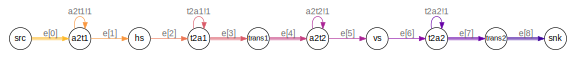

In [16]:
Gscale_test = get_scaling_graph(test_image(32))
G = Gscale_test
G.build(); 
G.plot_graph()

## Reflection

With respect to *rule of 6*, we had to confess that our design does not meet the *locality of reference*, *i.e*. `fo()` reads $\le$ 6 scalar values. The scaling nodes consumes 16 scaler values. We have considered to modify the finite state machine of both `A2T` and `T2A` node to delay the read/write to make scaling node can process no more than 6 scalers per firing. But we failed to change the behavior unfortunately. The material we refered to is `class zA2T(Node)` in [lecture note 11 array tokens], concretely `self.fs` is changed, but data on edge `e[1]` are flushed out and updated per firing. Therefore, we had to choose the design of this version.

# Verification

Convince yourself (and the readers of your report) that the ouput is functionally correct.

Explain throughput (pixels/sec, frames/sec), and compare with the required throughput.

## Functional verification

First we can use the test image to get an intuitive check.

In [17]:
Gscale_test.view(sim=True)

Output()

In [18]:
Gscale_test.sim(T=5000)

 #cycles real time  cpu time   #events  SDF=N  rate=100.0MHz
    4005  40.050us      1.2s      4648  quiescence (4ke/cs)


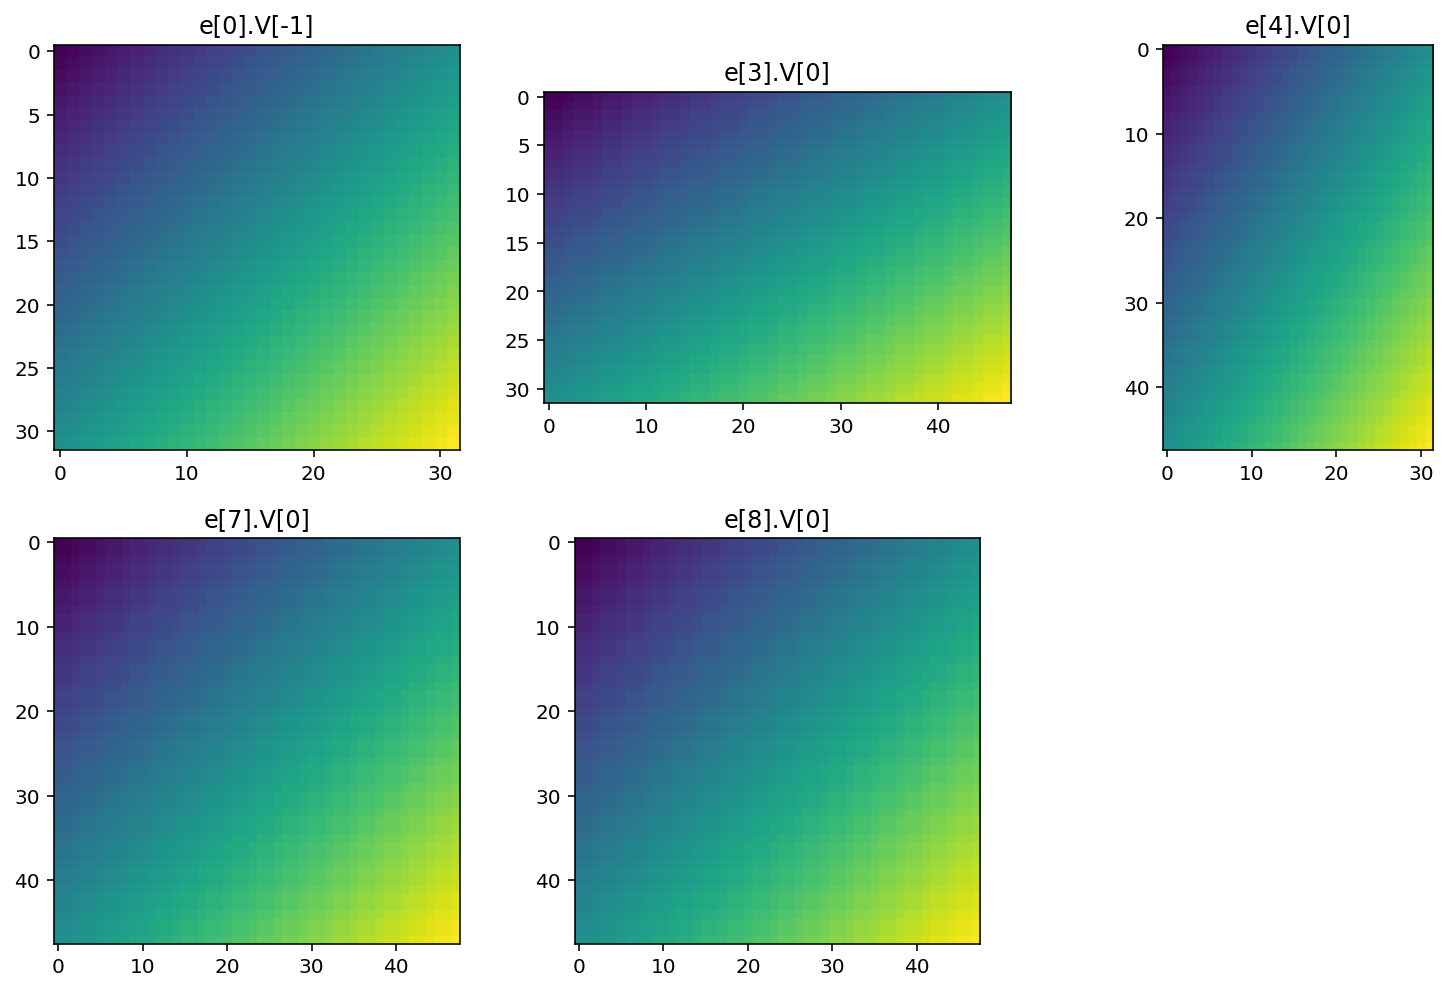

In [19]:
Gscale_test.plot_images(ncols=3)

We can observe that the output image is of size $48 \times 48$, and the image seems to be successfully scaled. We can make a preliminary estimate that our graph is functioning normally. But the given `test_image()` has two problems

- We can not observe the effect of the transposing, because the test images are diagonally symmetric
- We can not easily check whether the graph output correct value

So we define a ner version of test images, namely `new_test_image()`

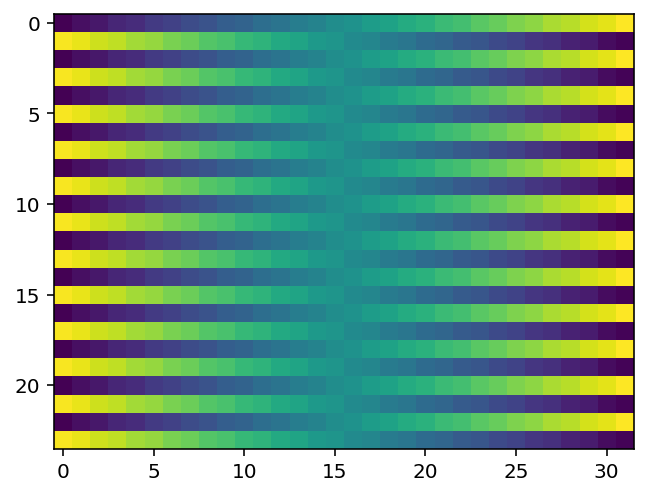

In [20]:
def new_test_image(w, l):
    res = []
    row1 = [1.5*i+1 if i%2==0 else 1.5*i+1.5 for i in range(w)]
    row2 = [1.5*(w-i-1)+1 if i%2==0 else 1.5*(w-i-1)+1.5 for i in range(w)]
    for i in range(l):
        if i % 2 == 0:
            res += row1
        else:
            res += row2
    return np.array(res).reshape((l, w))
plt.imshow(new_test_image(32, 24));

In this way, we can re-run the simulation again.

Gscale_test2 (Graph): no errors


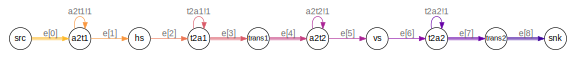

In [21]:
Gscale_test2 = get_scaling_graph(new_test_image(32, 24))
G = Gscale_test2
G.build(); 
G.plot_graph()

In [22]:
Gscale_test2.sim(T=5000)

 #cycles real time  cpu time   #events  SDF=N  rate=100.0MHz
    3005  30.050us      0.8s      3488  quiescence


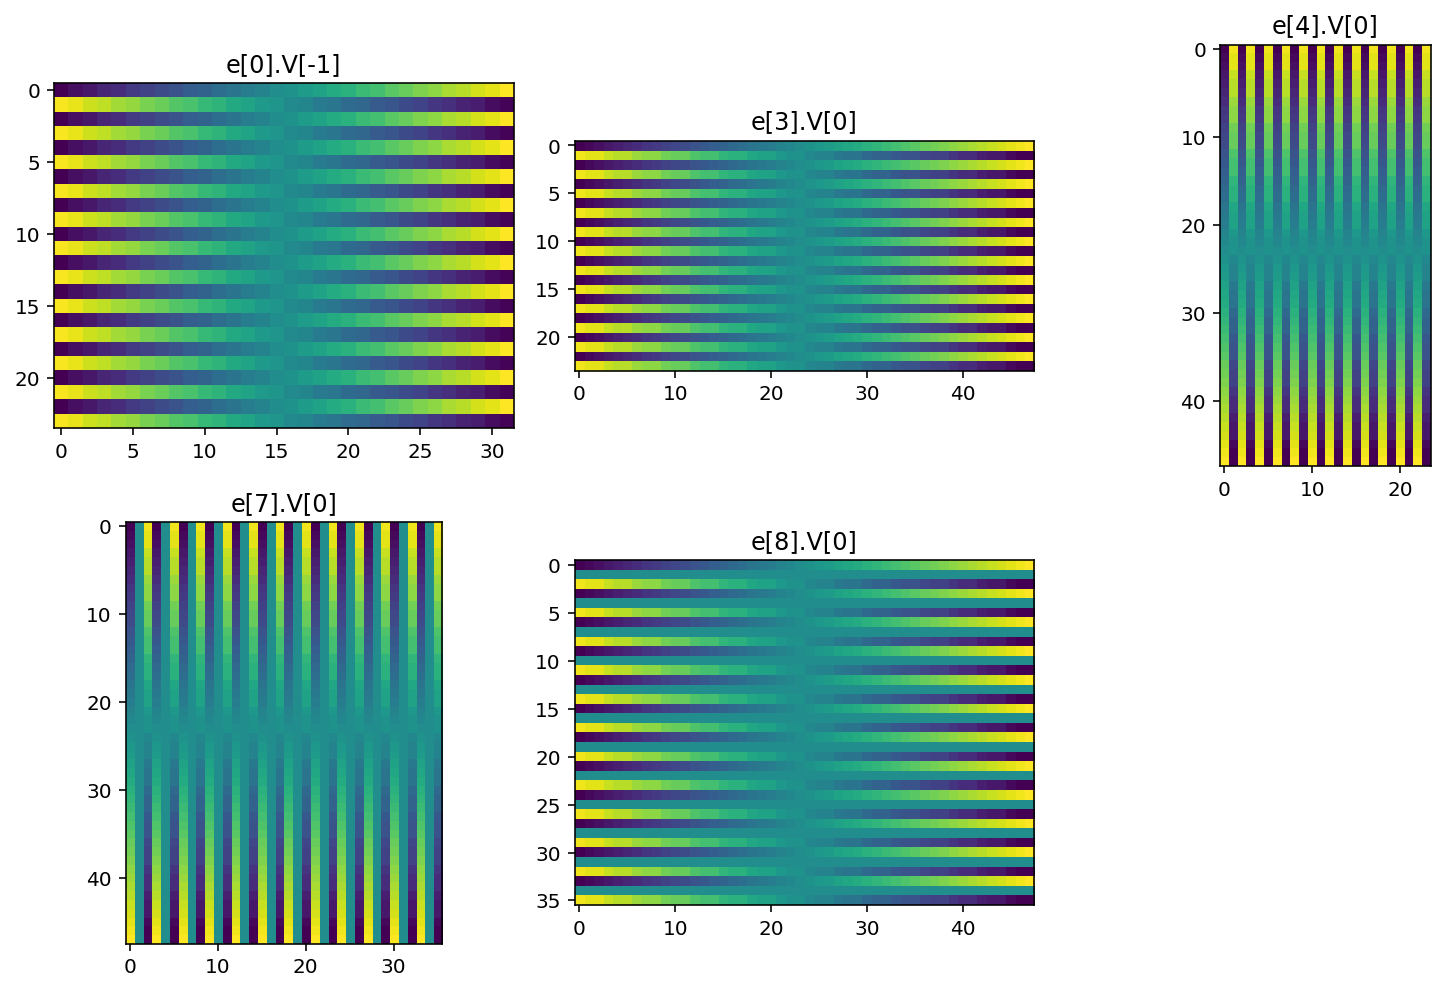

In [23]:
Gscale_test2.plot_images(ncols=3)

Using the new plots, we can observe that trasposing indeed works. Now we look into the detail, i.e. whether the added values are indeed the average. In the new test images, an odd row is consisted of pairs where the step is 2, and even rows are the reversed version of previous rows. For example, in the first row, the values are 1, 3, 4, 6, 7, 9...46, 48. So if the scaled picture is consecutive value from 1 to $3*w/2$, then we pass the quantitative check.

In [24]:
row = 1
Gscale_test2.e[8].data()[48*(row-1):48*(row), 1]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48.])

We can see that we indeed get consecutive values from 1 to 48 ($3*32/2$), and we can freely check for the other rows by specifing `row` above. So till now, we prove the functional correctness of our graph. We can also run the `valve.png` to prove the feasibility of our design.

In [25]:
Gscale_valve = get_scaling_graph(image2array('../images/valve.png'))
G = Gscale_valve
G.build(); 
Gscale_valve.sim(T=2e7)

../images/valve.png (image size= (640, 480))
Gscale_valve (Graph): no errors
 #cycles real time  cpu time   #events  SDF=N  rate=100.0MHz
   20900 209.000us     10.0s     97701  
   57100 571.000us     20.0s    133901  
   86000 860.000us     30.0s    162801  
  110700   1.107ms     40.0s    187501  
  132500   1.325ms     50.0s    209301  
  152100   1.521ms     60.1s    228901  
  170200   1.702ms     70.1s    247001  
  187100   1.871ms     80.1s    263901  
  202900   2.029ms     90.2s    279701  
  217900   2.179ms    100.2s    294701  
  232000   2.320ms    110.3s    308801  
  245600   2.456ms    120.3s    322401  
  258700   2.587ms    130.3s    335501  
  271300   2.713ms    140.4s    348101  
  283600   2.836ms    150.4s    360401  
  295400   2.954ms    160.5s    372201  
  306800   3.068ms    170.5s    383601  
  317700   3.177ms    180.5s    394501  
  328400   3.284ms    190.5s    405201  
  338800   3.388ms    200.6s    415601  
  349000   3.490ms    210.7s    425801  
 

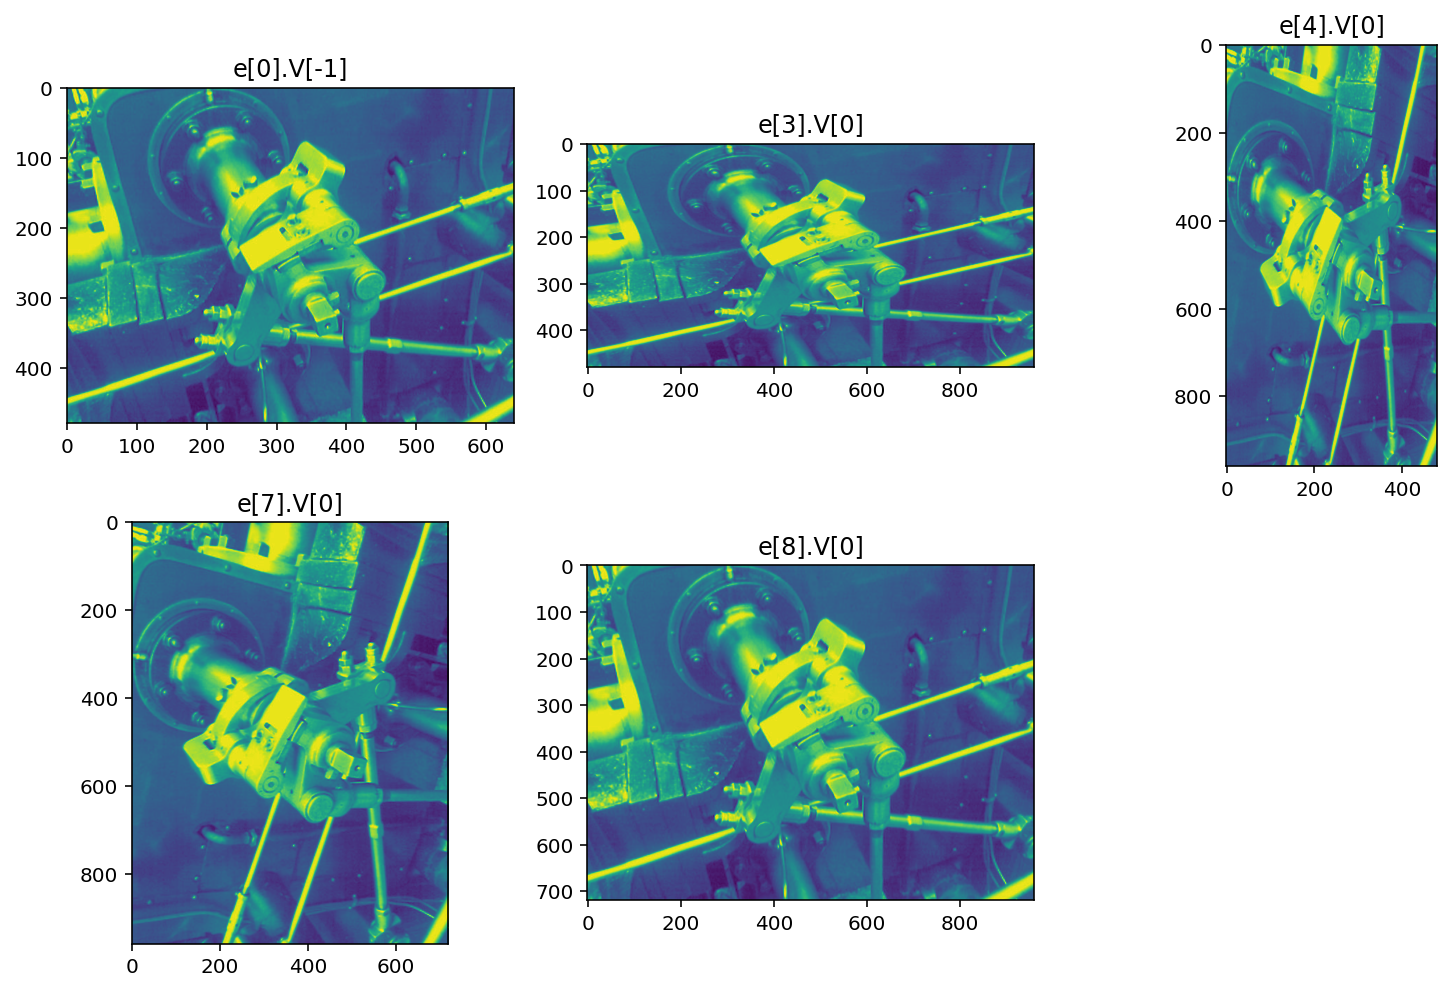

In [26]:
Gscale_valve.plot_images(ncols=3)

In case the computation time is too long or the figure is missing, we made a screenshot of the value output (`ncol=5`). 

![avatar](https://storage.live.com/items/A0F74AFD0BA8282D!827939?authkey=ABXqzzrLcu36XDU)


## Throughput verfication

We are required to process 100 Hz 720p video and output 1080p version. So we need to analyze the pixels/sec or frames/sec to check. First, we can count the number of firing, then multiply the graph rate 100 MHz to obtain the time to process one picture. For an 1280\*720 input, to read the whole image, there are 57600 firings required. Then, we get an intermediate image of size 1920\*720. To transpose such image, it needs 1382400 firings. Similarly, we will perform another scaling on the transposed image, so it will cost 86400 firings. Finally, one more transposing is required, so another 2073600 firings are needed. Note that we ignore some parallism for clarity. To sum up, there are approximately 3600000 cycles needed. The graph rate is 100 MHz, so to process one frame of 720p video to 1080p will cost 0.036s. That is to say, using this design, arbitrary 720p video less than 27.78 Hz (upper bound is 27.78 frames/sec), which is less than 100 Hz as required. So our design failed to process 100 Hz 720p video unfortunately. 

In [27]:
times = [1280*720/B, 1920*720, 1920*720/B, 1920*1080]
print(times)
print(sum(times))
spf = sum(times)/graph_rate`
print('The time required to process one frame:', spf, 's')
print('The maximum rate that this graph can handle:', 1/(sum(times)/graph_rate), 'Hz')

[57600.0, 1382400, 86400.0, 2073600]
3600000.0
The time required to process one frame: 0.036 s
The maximum rate that this graph can handle: 27.77777777777778 Hz


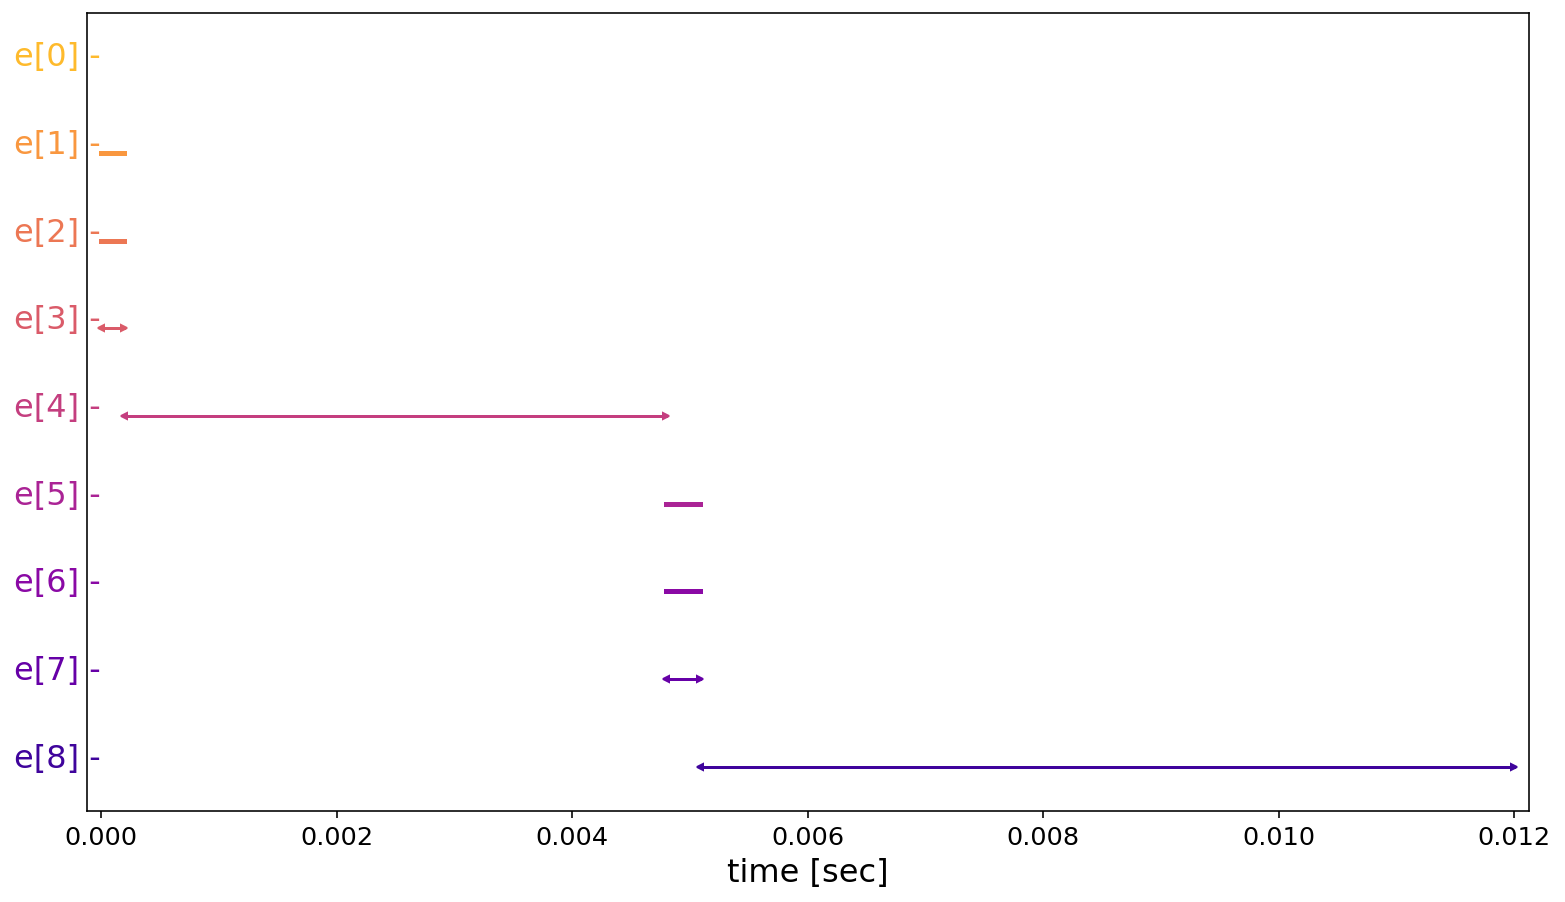

In [40]:
Gscale_valve.plot_flow();

# Resource Analysis

See 2IMN35 reporting guidelines.

Include a roofline as prepared below.
- `oi` is the operational intensity of your Video Scaler implementation.
- `rate` is the Gops/s of your Video Scaler implementation.

In this section, we will go over various metric to evaluate our graph. Note that we do not actually use 720p frames to check, so almost all analysis later will be theoretical.

## Throughput

In section 5.2, we have already calculated that the throughput of our design for 720p input and 1080p output is 27.78 Hz (27.78 frames/sec), which is lower than the requirements 100 Hz. So our design will not meet the throughput requirements unfortunately.

## Latency

The latency of one frame of 720p input and 1080p output is calculated in section 5.2, which is 0.036s.

## Memory

First, the RAM consumed for storing the input and output images is calculated in section 3.3, which is 2925 kB. And the memory consumed on other edges are 88 pixels, i.e. 88 bytes, This can be verified by graphs with arbitrary inputs, because the internal behavior is the same in this case. 

In [28]:
Gscale_test.view(sim=True)

Output()

In [29]:
16 + 16*1.5 + 1 + 1 + 16 + 16*1.5 + 1 + 1 + 4

88.0

## Read/write bandwidth of DRAM

In the previous analysis, we know that to process one frame, there will be 4 read/write operations. The first read is to read the 720p frame into nodes, and write a 1920\*720 frame back. Then after transposing, another read of size 1920\*720 is required, and the graph writes back the 1080p frame. So the total memory access amount of processing one frame $\mathcal M_{\textit{DRAM}}$ is 5625 kB. And this whole procedure happens in 0.036 s. So the DRAM bandwidth in this case is 152.59 MB/s.

In [30]:
amount = (1280*720 + 1920*720*2 + 1920*1080)/1024
print('total memory access amount:', amount, 'kB')
print('DRAM bandwidth:', amount/spf/1024, 'MB/s')

total memory access amount: 5625.0 kB
DRAM bandwidth: 152.587890625 MB/s


## Compute resource of nodes

To count the compute resource of nodes, the `plot_circuit()` method provides the internal visualizations. In this way, we can check the number of adders and multipliers. There are four nodes we need to check: `a2t1`, `t2a1`, `trans1` and `hs`.

a2t1       fs[0]      lambda x: 0 if x[1]==i0 else 2 if self.fi(x)==i0 else 1
a2t1       fo[0]      lambda x: tuple(x[0][x[1]:x[1]+B])
a2t1       fo[1]      lambda x: self.fi(x)
a2t1       self.fi    lambda x: 0 if x[1]+B >= self.I[0].size else x[1]+B
 


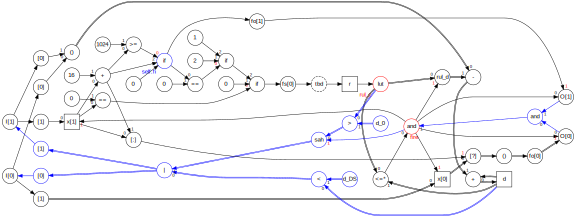

In [31]:
Gscale_test.a2t1.plot_circuit()  # 3 adder 

t2a1       fs[0]      lambda x: 0 if x[1]==i0 else 2 if self.fi(x)==i0 else 1
t2a1       fo[0]      lambda x: (x[1], x[0]), self.fi
t2a1       fo[1]      lambda x: 0 if x[1]+B >= self.O[0].size else x[1]+B
t2a1       fa[0]      lambda x: self._A0[0].copy()
t2a1       self.fi    lambda x: 0 if x[1]+B >= self.O[0].size else x[1]+B
 


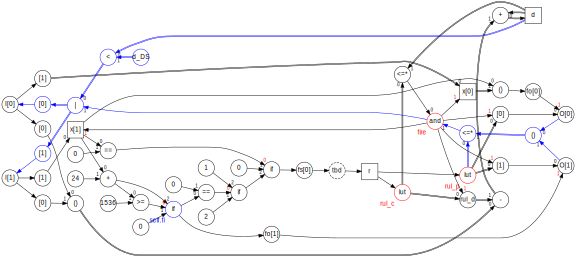

In [32]:
Gscale_test.t2a1.plot_circuit()  # 3 adder

hs         fo[0]      lambda x: tuple(np.uint8(np.array([ x[0], int((int(x[0])+x[1])/2), x[1], x[2], int((int(x[2])+x[3])/2), x[3], x[4], int((int(x[4])+x[5])/2), x[5], x[6], int((int(x[6])+x[7])/2), x[7], x[8], int((int(x[8])+x[9])/2), x[9], x[10], int((int(x[10])+x[11])/2), x[11], x[12], int((int(x[12])+x[13])/2), x[13], x[14], int((int(x[14])+x[15])/2), x[15] ])))
 


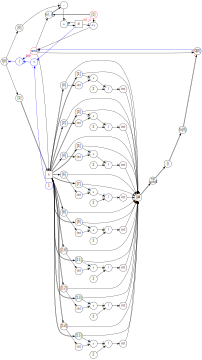

In [33]:
Gscale_test.hs.plot_circuit()  # 10 adder, 8 multipliers

trans1     fo[0]      lambda x,r: (r, x[l*(r%w)+(r//w)])
trans1     fa[0]      lambda x: self._A0[0].copy()
 


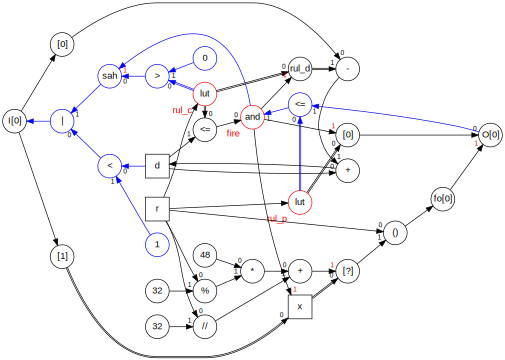

In [34]:
Gscale_test.trans1.plot_circuit()  # 3 adders, 1 multiplier

So, we can use a table to show the number of compute resource consumpted.

| Node               | Compute resource usage per node
| :---               | :---
|  2 $\times$ a2t1   | <div style="width: 150pt"> 3 adders
|  2 $\times$ t2a1   | <div style="width: 150pt"> 3 adders
|  2 $\times$ trans1 | <div style="width: 150pt"> 3 adders, 1 multiplier
|  2 $\times$ hs     | <div style="width: 150pt"> 10 adder, 8 multipliers

Hence, the total computation resource usage is 38 adders and 18 multipliers.

In [35]:
2*(3+3+3+10), 2*(1+8)

(38, 18)

## Utilization

The utilization, a.k.a. Hardware Utilization Efficiency (HUE) is defined as *the average number of firings per clock cycle* (from lecture note 7). For all graphs we consider, the utilizations are the same, it is

$$
\textit{HUE} \approx 16\%
$$

$HUE$ here is low because during transposing, other nodes are idle. We did not find a proper way to perform block transposing, concretely, block read / write non-consecutive blocks. For example, if we read a block row by row, the transposed block will be at different column. We failed to write these distributed values in one firing.

In [36]:
print('HUE = %.2f%%' %(((times[0]+times[2]) + 1/8 * (times[1]+times[3]))/sum(times)*100))

HUE = 16.00%


## Roofline analysis

To perform roofline analysis here, the operational intensity and Gops/s of the scaler need to be calculated. According to the [lecture-11-rooflines], *operational intensity* `oi` is the amount of compute per unit DRAM traffic. In section 3.4, we know that the workload $\mathcal W_{poorman}=4608000$, and the DRAM traffic $\mathcal M_{\textit{DRAM}}=5625 kB$. So we have

$$
oi = \frac{\textit{number_of_operations}}{\textit{amount_of_DRAM_traffic (input + output) [bytes]}} = \frac{\mathcal W_{poorman}}{\mathcal M_{\textit{DRAM}}} = 0.4096\ \textit{ops/byte}
$$

In [37]:
w_poor / (5625*1000)

0.4096

We can see that `oi` here is less than arithmetric intensity as expected. Then, the Gops/s of the scaler is

In [38]:
w_poor / spf / 1e9

0.064

Then we can can perform a roofline analysis. And we can conclude that our graph can be implemented on PYNQ-Z1 board using DDR3 RAM without computation/bandwidth restrictions.

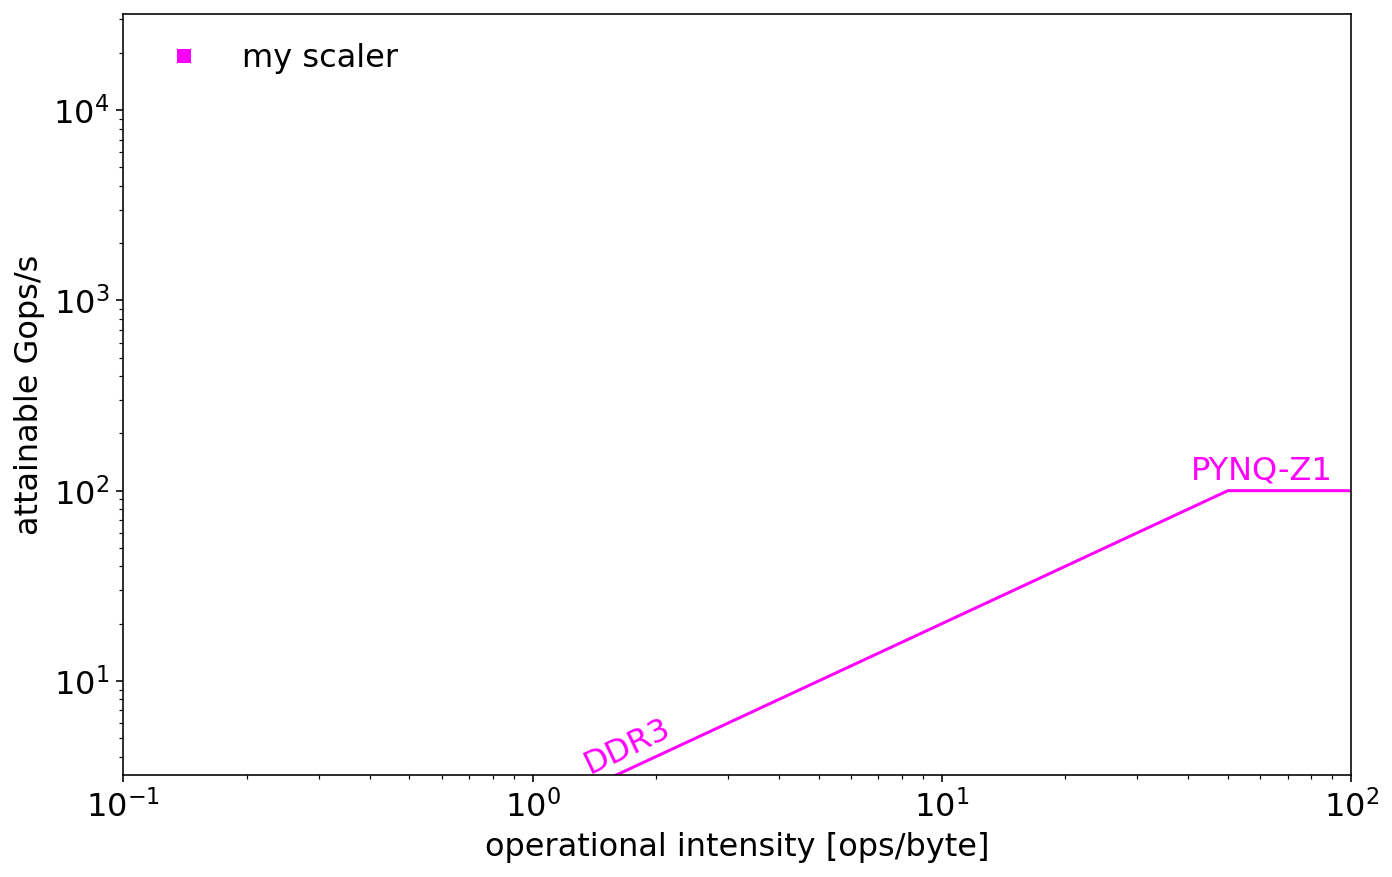

In [39]:
F_scaler = F_dsp('my scaler', oi=0.4096, rate=0.064)
R_scaler = roofline(M_PYNQ, F_scaler, shape='s', color='magenta')
roofline_plot([R_scaler]).plot();

# Conclusion

In this assignment, we design a graph for video scaling from 720p to 1080p. First, the graph is horizontally scaled, then transposed, again horizontally scaled, and finally transposed to keep origin direction. We designed the transposing nodes and horizontal scaling nodes, and with the help of `A2T` and `T2A` provided in `StaccatoLab` library. From the simulation, we can conclude that our design successfully scales the video frame, but does not meet the 100 Hz throughput requirements. 

## Reflection*

The reason why we can only achieve 27.78 Hz throughput, other than a more effective graph is that we failed to find a way to perform block transposing. In current design, the transposing node is extremely time-wasting, because it can only manipulate one pixel per firing. As far as we can see, the `A2T` and `T2A` can only read / write consecutive tokens as a block from a configurable position. But if we read a row block, the transposed position will be a column, which is not consecutive in row-manner storage. So it will still cost `B` firings to write back. This is our biggest unsolved problem. If we manage to handle it, I think we can achieve desired performance.

# Bibliography

1. Video scaler [link](https://en.wikipedia.org/wiki/Video_scaler)
2. Image scaling [link](https://en.wikipedia.org/wiki/Image_scaling#Sinc_and_Lanczos_resampling):

3. Lanczos resampling [link](https://en.wikipedia.org/wiki/Lanczos_resampling)